# Averaging Example

Example system of 

$$
\begin{gather*}
    \ddot{x} + \epsilon \left( x^2 + \dot{x}^2 - 4 \right) \dot{x} + x = 0.
\end{gather*}
$$

For this problem, $h(x,\dot{x}) = x^2 + \dot{x}^2 - 4$ where $\epsilon \ll 1$. The if we assume the solution for x to be 
$$
\begin{gather*}
    x(t) = a\cos(t + \phi) = a \cos\theta
\end{gather*}
$$
we have 
$$
\begin{align*}
    h(x,\dot{x}) &= \left(a^2\cos^2\theta + a^2\sin^2\theta - 4\right)\left(-a\sin\theta\right)\\
    &= -a^3\cos^2\theta\sin\theta - a^3\sin^3\theta + 4a\sin\theta.
\end{align*}
$$
From the averaging equations we know that 
\begin{align*}
    \dot{a} &= \dfrac{\epsilon}{2\pi}\int_0^{2\pi}{\left( -a^3\cos^2\theta\sin\theta - a^3\sin^3\theta + 4a\sin\theta \right)\sin\theta}{d\theta}\\
    &= \dfrac{\epsilon}{2\pi}\int_{0}^{2\pi}{\left( -a^3\cos^2\theta\sin^2\theta - a^3\sin^4\theta + 4a\sin^2\theta \right)}{d\theta}
\end{align*}
since 
\begin{gather*}
    \int_{0}^{2\pi}{\cos^2\theta\sin^2\theta}{d\theta} = \dfrac{\pi}{4}\\
    \int_{0}^{2\pi}{\sin^2\theta}{d\theta} = \pi\\
    \int_{0}^{2\pi}{\sin^4\theta}{d\theta} = \dfrac{3\pi}{4}
\end{gather*}
we have 
\begin{align*}
    \dot{a} = 2\epsilon a - \dfrac{\epsilon}{2}a^3 + O(\epsilon^2).
\end{align*}
To solve this analytically, let $b = a^{-2}$, then
\begin{gather*}
    \dot{b} = -2a^{-3}\dot{a} \phantom{-} \longrightarrow \phantom{-} \dot{a} = -\dfrac{1}{2}a^3b.
\end{gather*}
If we plug this back into the nonlinear ODE we get 
\begin{gather*}
    -\dfrac{1}{2}a^3\dot{b} - 2\epsilon a = -\dfrac{\epsilon}{2}a^3\\
    \therefore \dot{b} + 4\epsilon b = \epsilon.
\end{gather*}
This nonhomogeneous linear ODE can be solved by
$$
\begin{align*}
    b(t) &= e^{\int{-4\epsilon t}{dt}}\left[ \int{\epsilon e^{\int{4\epsilon t}{dt}}}{dt} + C \right]\\
    &= \dfrac{1}{4} + Ce^{-4\epsilon t}.
\end{align*}
$$
If we apply the initial condition of $a(0) = a_0$ we get
\begin{gather*}
    b(t) = \dfrac{1}{4} + \left( \dfrac{1}{a_0^2} - \dfrac{1}{4} \right)e^{-4\epsilon t}.
\end{gather*}
And therefore,
\begin{gather*}
    a(t) = \sqrt{\dfrac{1}{\dfrac{1}{4} + \left( \dfrac{1}{a_0^2} - \dfrac{1}{4} \right)e^{-4\epsilon t}}} + O(\epsilon^2).
\end{gather*}
Additionally,
\begin{align*}
    \dot{\phi} &= \dfrac{\epsilon}{2\pi}\int_{0}^{2\pi}{\left(-a^3\cos^2\theta\sin\theta - a^3\sin^3\theta + 4a\sin\theta \right)\cos\theta}{d\theta}\\
    &= \dfrac{\epsilon}{2\pi}\int_{0}^{2\pi}{\left(-a^3\cos^3\theta\sin\theta - a^3\cos\theta\sin^3\theta + 4a\cos\theta\sin\theta \right)}{d\theta}\\
    &= 0
\end{align*}
and thus, 
\begin{gather*}
    \phi(t) = \phi_0 + O(\epsilon^2).
\end{gather*}
Finally, we have the following approximated expression 
\begin{gather*}
    x(t) = \sqrt{\dfrac{1}{\dfrac{1}{4} + \left( \dfrac{1}{a_0^2} - \dfrac{1}{4} \right)e^{-4\epsilon t}}}\cos\left( t + \phi_0 \right) + O(\epsilon^2).
\end{gather*}
If we assume, $\dot{x} = 0$ 
\begin{gather*}
    0 = -a_0\sin\phi_0\\
    \therefore \phi_0 = 0.
\end{gather*}
Hence,
\begin{gather*}
    {x(t) = \sqrt{\dfrac{1}{\dfrac{1}{4} + \left( \dfrac{1}{a_0^2} - \dfrac{1}{4} \right)e^{-4\epsilon t}}}\cos\left( t \right) + O(\epsilon^2).}
\end{gather*}

Since $\omega = 1$ for this approximation, the period $T$ of the limit cycle is 
\begin{gather*}
    {T = \dfrac{2\pi}{\omega} = 2\pi.}
\end{gather*}

In [1]:
# We plot the phase plane of this system to check the limit cycle 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, DOP853
from typing import List

In [2]:
# System
def nlsys(t, x, epsilon):
    return [x[1], -epsilon*(x[0]**2 + x[1]**2 - 4)*x[1] - x[0]]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func, params):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y), *params.values())  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray, params: dict):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys, params
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    if tspan[0] < 0:
        t1 = np.linspace(0, tspan[0], tspan[2])
        t2 = np.linspace(0, tspan[1], tspan[2])
        if min(tspan) < 0:
            t_span1 = (np.max(t1), np.min(t1))
        else:
            t_span1 = (np.min(t1), np.max(t1))
        t_span2 = (np.min(t2), np.max(t2))
        for x0i in x0:
            sol1 = solve_diffeq(sys, t1, t_span1, x0i, params)
            plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
            sol2 = solve_diffeq(sys, t2, t_span2, x0i, params)
            plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
    else:
        t = np.linspace(tspan[0], tspan[1], tspan[2])
        t_span = (np.min(t), np.max(t))
        for x0i in x0:
            sol = solve_diffeq(sys, t, t_span, x0i, params)
            plt.plot(sol.y[0, :], sol.y[1, :], '-r')
        

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

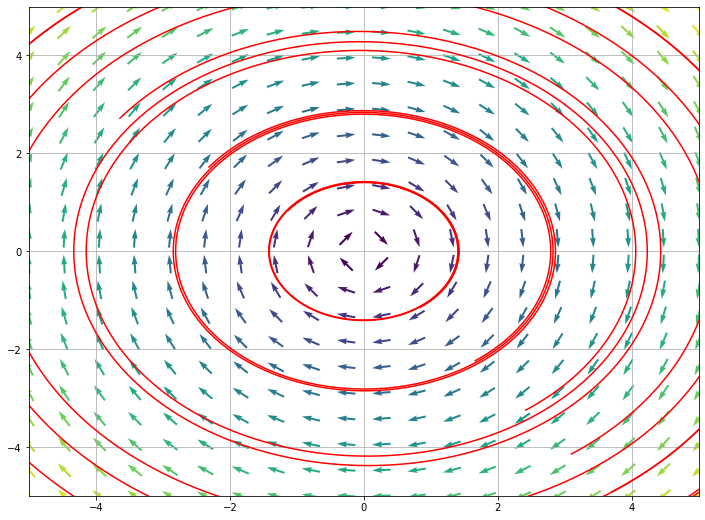

In [5]:
x10 = np.arange(0, 10, 1)
x20 = np.arange(0, 10, 1)
x0 = np.stack((x10, x20), axis=-1)

p = {'epsilon': 0.001}

x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)

DEplot(nlsys, (-8, 8, 1000), x0, x1, x2, p)

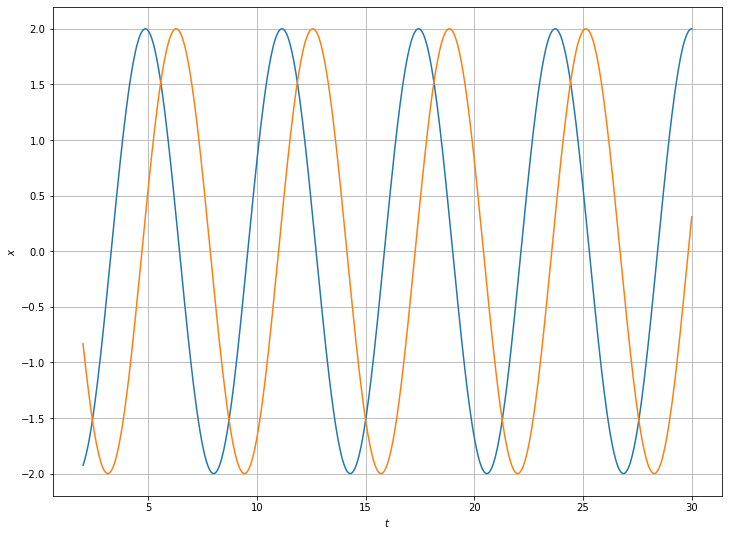

In [12]:
# Compare the approximation to the actual solution 
# let a = 2

tmax = 2
tmin = 30
tspan = np.linspace(tmin, tmax, 1000)
# ODE solver solution 
sol =  solve_diffeq(nlsys, tspan, (tmin, tmax), [2, 0], p)

# Approximation 
def nlsys_averaging(t, a, e):
    return np.sqrt(1 / (0.25 +  (1/a**2 - 0.25) * np.exp(-4*e*t))) * np.cos(t)

approx = nlsys_averaging(tspan, 2, 0.001)

plt.figure(figsize=(12, 9))
plt.plot(tspan, sol.y[0, :])
plt.plot(tspan, approx)
plt.grid(True)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()